In [1]:
import pandas as pd

dtb = pd.read_excel(r"C:\Users\user\programming\projeto_tpad\dados\NEGÓCIOS\dtb_uf.xlsx")
pib = pd.read_excel(r"C:\Users\user\programming\projeto_tpad\dados\NEGÓCIOS\pib_2010a2018.xlsx")

In [2]:
dtb

,cod_uf,nome_uf,sigla_uf,cod_regiao,regiao
0,11,Rondônia,RO,1,Norte
1,12,Acre,AC,1,Norte
2,13,Amazonas,AM,1,Norte
3,14,Roraima,RR,1,Norte
4,15,Pará,PA,1,Norte
5,16,Amapá,AP,1,Norte
6,17,Tocantins,TO,1,Norte
7,21,Maranhão,MA,2,Nordeste
8,22,Piauí,PI,2,Nordeste
9,23,Ceará,CE,2,Nordeste


In [3]:
pib

,ano,cod_uf,pib
0,2010,11,23.90789
1,2010,12,8.34236
2,2010,13,60.87712
3,2010,14,6.63915
4,2010,15,82.68452
...,...,...,...
238,2018,43,457.29396
239,2018,50,106.96914
240,2018,51,137.44285
241,2018,52,195.68172


In [4]:
# Juntando os dois DataFrames

dados = pd.merge(left = dtb, right = pib, how = "left")

In [5]:
# AS 5 PIORES ECONOMIAS DO BRASIL EM 2018:

worst_pib = (
    dados.query("ano == 2018")[["pib", "nome_uf"]]
    .sort_values(by = "pib")
)
worst_pib.index = range(worst_pib.shape[0])
worst_pib.head(5)

,pib,nome_uf
0,13.36999,Roraima
1,15.33112,Acre
2,16.79521,Amapá
3,35.66618,Tocantins
4,42.01798,Sergipe


In [6]:
# PIORES ECONOMIAS DO NORDESTE EM 2018:
ne = (
    dados.query("regiao == 'Nordeste' and ano == 2018")[["nome_uf","pib"]]
    .sort_values(by = "pib")[0:5]
)
ne.index = range(ne.shape[0])
ne

,nome_uf,pib
0,Sergipe,42.01798
1,Piauí,50.37842
2,Alagoas,54.41305
3,Paraíba,64.37360
4,Rio Grande do Norte,66.96956


In [7]:
# OS 5 ESTADOS COM MAIOR AUMENTO DE PIB ENTRE 2010-2018
total = (
    dados.query("ano.isin([2010, 2018])")
    .sort_values(by = ["cod_uf", "pib"], ascending = [False, True])
    .assign(diferenca = lambda x: x.groupby("cod_uf")["pib"].pct_change() * 100).round(2)
    .filter(["cod_uf", "nome_uf", "regiao", "diferenca"])
)
total = total.sort_values(by = "diferenca", ascending= False)
total.index = range(total.shape[0])
total = total[0:27]
total.head(5)

,cod_uf,nome_uf,regiao,diferenca
0,51,Mato Grosso,Centro-Oeste,142.83
1,50,Mato Grosso do Sul,Centro-Oeste,126.29
2,22,Piauí,Nordeste,126.23
3,17,Tocantins,Norte,117.41
4,21,Maranhão,Nordeste,112.01


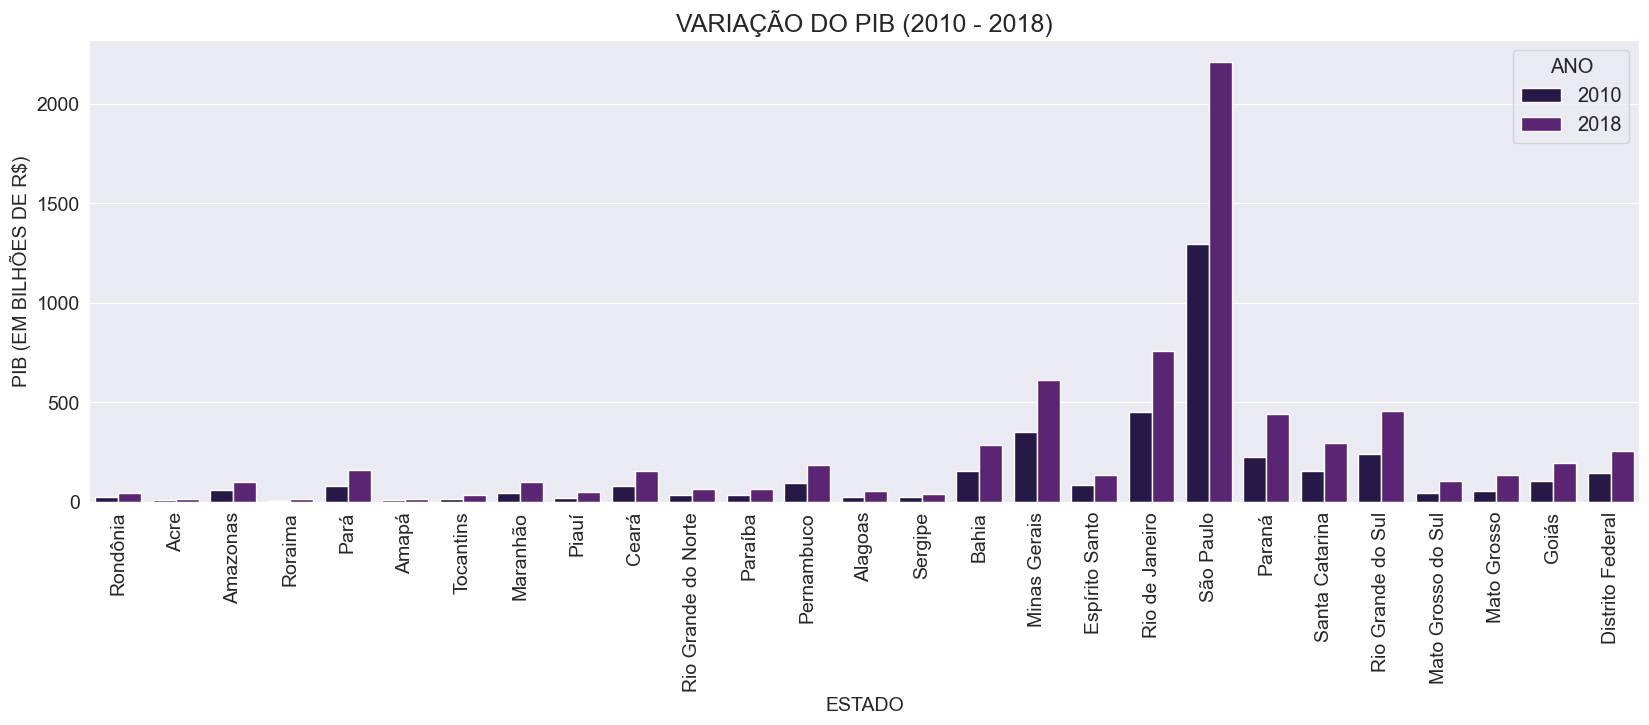

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

piby = dados.query("ano.isin([2010, 2018])")

plt.figure(figsize=(20, 6))

sns.set_palette("magma")
sns.set_style("darkgrid")

ax = sns.barplot(y='pib', x='nome_uf', hue = "ano", data= piby, orient = "v")
ax.set_xlabel("ESTADO", fontsize = 14)
ax.set_ylabel("PIB (EM BILHÕES DE R$)", fontsize = 14)
ax.set_title("VARIAÇÃO DO PIB (2010 - 2018)", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)

plt.legend(title = "ANO", fontsize = "x-large", title_fontsize = "x-large")